In [3]:
!pip install transformers
!pip install keras


In [4]:
classifier=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [43]:
def sentiment_score(result):

  if result[0]['label'] == 'NEGATIVE':
    return result[0]['score'] * -1
  else:
    return result[0]['score']

In [10]:
import pandas as pd

In [11]:
data=pd.read_csv('data_with_vader.csv')

In [12]:
data.head()

,Unnamed: 0,Price,Open,High,Low,Vol.,Change %,combined_news,negative,neutral,positive,compound,sentiment_polarity,sentiment_subjectivity
0,0,11734.32,11432.09,11759.96,11388.04,212830000.0,2.65%,Georgia downs two Russian warplanes as coun...,0.214,0.752,0.033,-0.9977,-0.055870,0.273787
1,1,11782.35,11729.67,11867.11,11675.53,183190000.0,0.41%,Why wont America and Nato help us If they wo...,0.172,0.746,0.082,-0.9801,0.120954,0.340073
2,2,11642.47,11781.70,11782.35,11601.52,173590000.0,-1.19%,Rememer that adorale 9 year old who sang at t...,0.166,0.780,0.053,-0.9937,-0.029923,0.420418
3,3,11532.96,11632.81,11633.78,11453.34,182550000.0,-0.94%,U.S. refuses Israel weapons to attack Iran ...,0.149,0.789,0.061,-0.9843,-0.020781,0.384336
4,4,11615.93,11532.07,11718.28,11450.89,159790000.0,0.72%,All the experts admit that we should legalise...,0.173,0.723,0.104,-0.9801,0.051094,0.406349


In [71]:
from transformers import AutoTokenizer, pipeline

model_name="distilbert-base-uncased-finetuned-sst-2-english"
classifier = pipeline("sentiment-analysis",model=model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define the sentiment score function
def sentiment_score(result):
    if result[0]['label'] == 'NEGATIVE':
        return result[0]['score'] * -1
    else:
        return result[0]['score']


In [76]:
!pip install tqdm

In [77]:
from tqdm import tqdm

# Initialize an empty list to store sentiment scores
bert_score = []

# Initialize tqdm progress bar
for news in tqdm(data['combined_news'], desc="Processing News Articles"):
    inputs = tokenizer(news, truncation=True, max_length=512, return_tensors='pt')
    truncated_news = tokenizer.decode(inputs['input_ids'][0], skip_special_tokens=True)
    result = classifier(truncated_news)
    bert_score.append(sentiment_score(result))


Processing News Articles: 100%|██████████| 1989/1989 [33:33<00:00,  1.01s/it]


In [79]:
data['bert_score'] = bert_score

In [80]:
data.head()

,Unnamed: 0,Price,Open,High,Low,Vol.,Change %,combined_news,negative,neutral,positive,compound,sentiment_polarity,sentiment_subjectivity,bert_score
0,0,11734.32,11432.09,11759.96,11388.04,212830000.0,2.65%,Georgia downs two Russian warplanes as coun...,0.214,0.752,0.033,-0.9977,-0.055870,0.273787,-0.998241
1,1,11782.35,11729.67,11867.11,11675.53,183190000.0,0.41%,Why wont America and Nato help us If they wo...,0.172,0.746,0.082,-0.9801,0.120954,0.340073,-0.996252
2,2,11642.47,11781.70,11782.35,11601.52,173590000.0,-1.19%,Rememer that adorale 9 year old who sang at t...,0.166,0.780,0.053,-0.9937,-0.029923,0.420418,-0.998227
3,3,11532.96,11632.81,11633.78,11453.34,182550000.0,-0.94%,U.S. refuses Israel weapons to attack Iran ...,0.149,0.789,0.061,-0.9843,-0.020781,0.384336,-0.988580
4,4,11615.93,11532.07,11718.28,11450.89,159790000.0,0.72%,All the experts admit that we should legalise...,0.173,0.723,0.104,-0.9801,0.051094,0.406349,-0.980323


In [82]:
data.to_csv('vader+textblob+bert score.csv')

In [88]:
(data[['compound','bert_score']]).corr()

,compound,bert_score
compound,1.000000,0.041069
bert_score,0.041069,1.000000


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

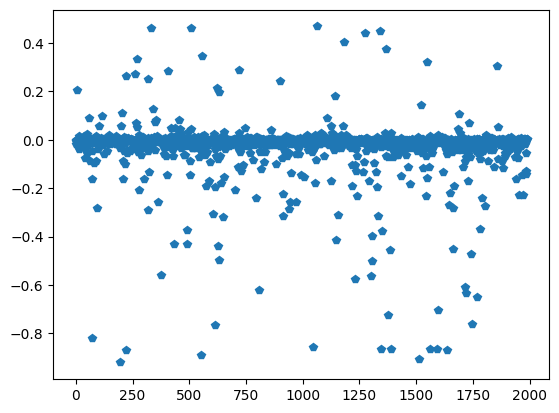

In [97]:
difference=abs(data['compound'])-abs(data['bert_score'])
plt.plot(difference,'p')
plt.show()

<Axes: xlabel='bert_score', ylabel='Count'>

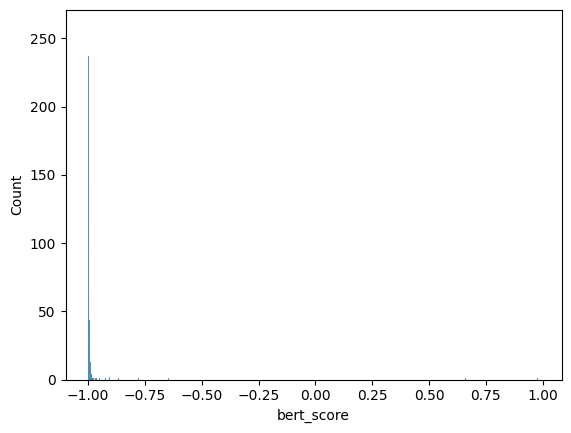

In [101]:
sns.histplot(data['bert_score'])

<Axes: xlabel='compound', ylabel='Count'>

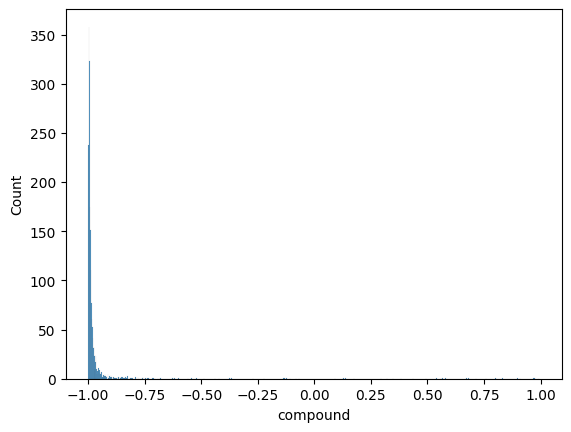

In [102]:
sns.histplot(data['compound'])